# Homework 1 Assignment

## Instructions

In this assignment, we will explore the passenger list of the Titanic, as provided in a well-known [Kaggle](https://www.kaggle.com) competition. For this assignment, we are concerned only with initial exploration. Please answer the specific questions listed below.

The dataset is a list of passengers. The second column of the dataset is the label for each person indicating whether that person survived (1) or did not survive (0). The data is described in more detail below.

There is no need to download the data from Kaggle. We have provided the titanic.csv dataset for you in the same  directory as this assignment.

Please do all your analysis to answer the questions below in this Jupyter notebook. Show your work. Questions 10, 13, and 14 ask for your thoughts as a few sentences (regular prose, not code :-).

**Please submit your completed notebook by 11:59PM on Thursday, December 17.**

## About the Data

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

### Load Data

Start by loading the Titanic data into a numpy array. The code to do this is included below to get you started.

In [1]:

import csv as csv
import numpy as np
import pandas as pd



In [3]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/HW%20Assignments/HW1/titanic.csv"
Data_Titanic = pd.read_csv(url)

## Homework Questions

**1) How many passengers are in our passenger list? For this assignment, we’ll assume our dataset represents the full passenger list for the Titanic.**

In [5]:
len(Data_Titanic)
# There were 891 passengers in our list

891

In [6]:
Data_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


**2) What is the overall survival rate (as a percentage of total passengers in our list)?**

In [12]:
Number_Survived = len(Data_Titanic[Data_Titanic.Survived == 1])
Survival_rate = float(Number_Survived)/len(Data_Titanic)
print(Survival_rate)
print("Survival rate = %.2f" %Survival_rate) #38% 

0.383838383838
Survival rate = 0.38


**3) How many male passengers were onboard?**

In [16]:
Num_Males = len(Data_Titanic[Data_Titanic.Sex == 'male'])
print("There were %d Males onboard" %Num_Males)

There were 577 Males onboard


**4) How many female passengers were onboard?**

In [17]:
Num_Females = len(Data_Titanic[Data_Titanic.Sex == 'female'])
print("There were %d Females onboard" %Num_Females)

There were 314 Females onboard


**5) What is the overall survival rate of male passengers?**

In [21]:
Males_Survived = len(Data_Titanic[((Data_Titanic.Sex == 'male') & (Data_Titanic.Survived == 1)) ])
Ratio_Males_Survived = float(Males_Survived)/Num_Males
print("Survival rate of Male Passengers was = %.2f" %Ratio_Males_Survived)

Survival rate of Male Passengers was = 0.19


**6) What is the overall survival rate of female passengers?**

In [22]:
Females_Survived = len(Data_Titanic[((Data_Titanic.Sex == 'female') & (Data_Titanic.Survived == 1)) ])
Ratio_Females_Survived = float(Females_Survived)/Num_Females
print("Survival rate of Male Passengers was = %.2f" %Ratio_Females_Survived)

Survival rate of Male Passengers was = 0.74


**7) What is the average age of all passengers onboard?**

In [26]:
print("The average age of all passers onboard was %.2f" %Data_Titanic.Age.mean())


#Mean takes care of NaN values itself. Alternatively we could only count non-empty values and 
#Divide it with sum of non-empty values

The average age of all passers onboard was 29.70


**8) What is the average age of passengers who survived?**

In [31]:
Average_age_survived = Data_Titanic[(Data_Titanic.Survived == 1)].Age.mean()
print("Average age of passengers who survived was = %.2f" %Average_age_survived)

Average age of passengers who survived was = 28.34


**9) What is the average age of passengers who did not survive?**

In [32]:
Average_age_Not_survived = Data_Titanic[(Data_Titanic.Survived == 0)].Age.mean()
print("Average age of passengers who did not survive was = %.2f" %Average_age_Not_survived)

Average age of passengers who did not survive was = 30.63


**10) At this (early) point in our analysis, what might you infer about any patterns you are seeing in who survived / did not survive?**

Females survived way more than Males. Survivors were slightly younger on average as well - although the age difference is not that significant. 

**11) How many passengers are in each of the three classes of service (e.g. First, Second, Third?)**

In [35]:
Classes = [1, 2, 3]
for i in Classes:
    print("Number of people in class %d was %d" %(i, len(Data_Titanic[Data_Titanic.Pclass == i])))


Number of people in class 1 was 216
Number of people in class 2 was 184
Number of people in class 3 was 491


**12) What is the survival rate for passengers in each of the three classes of service?**

In [37]:
Classes =[1, 2, 3]
for i in Classes:
    total_number = len(Data_Titanic[Data_Titanic.Pclass == i])
    Survived_number = len(Data_Titanic[(Data_Titanic.Pclass == i) & Data_Titanic.Survived == 1])
    Survival_ratio = float(Survived_number)/total_number
    print("Survival Rate for Class %i was %.2f" %(i, Survival_ratio))
    


Survival Rate for Class 1 was 0.63
Survival Rate for Class 2 was 0.47
Survival Rate for Class 3 was 0.24


**13) How does what we learned in 11) and 12) influence our early conclusions from 10) ?**

It augments our conclusion, demonstrating that Class also has an important influence. 1st Class passengers had singnifacntly more survival rate than 2nd and third. Third class had the lowest survival rate.

**14) If we were to build a predictive model, which features in the data do you think we should include in the model and which can we leave out? Why?**

Based on what we have found so far, Pclass and gender are important because they have significantly different survival rates as they change. Age might have some help but it's minor by comparison and could be left out. It would have been great to also consider correlation matrix and explore that


#### 15. Bonus - use visualization techniques for few variables of interest

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

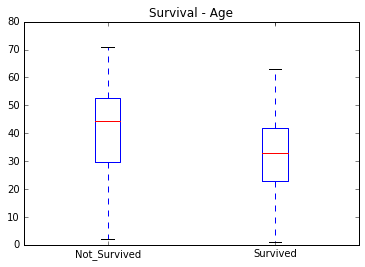

In [62]:
# You should drop Na Values
Data_Titanic.dropna(inplace = True)
plt.boxplot([Data_Titanic['Age'][Data_Titanic.Survived == 0], 
             Data_Titanic['Age'][Data_Titanic.Survived == 1]])
plt.xticks([1, 2], ['Not_Survived', 'Survived'])
plt.title('Survival - Age')
plt.show()

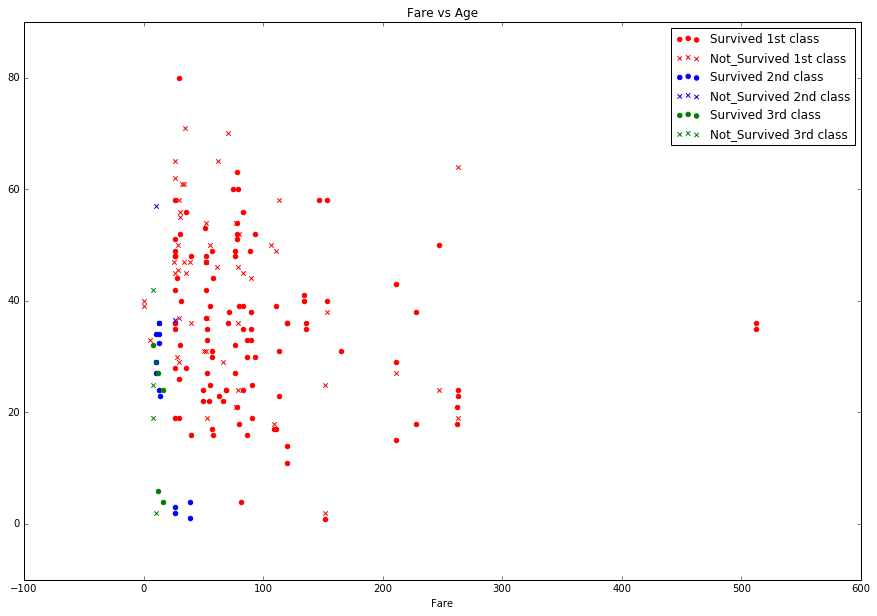

In [89]:
plt.figure(figsize=(15,10))

plt.scatter(Data_Titanic['Fare'][(Data_Titanic.Pclass == 1) & (Data_Titanic.Survived == 1)], 
            Data_Titanic['Age'][(Data_Titanic.Pclass == 1) & (Data_Titanic.Survived == 1)], 
            color = 'r',
            label = 'Survived 1st class'
            )

plt.scatter(Data_Titanic['Fare'][(Data_Titanic.Pclass == 1) & (Data_Titanic.Survived == 0)], 
            Data_Titanic['Age'][(Data_Titanic.Pclass == 1) & (Data_Titanic.Survived == 0)], 
            color = 'r',
            label = 'Not_Survived 1st class',
            marker = 'x'
            )

plt.scatter(Data_Titanic['Fare'][(Data_Titanic.Pclass == 2) & (Data_Titanic.Survived == 1)], 
            Data_Titanic['Age'][(Data_Titanic.Pclass == 2) & (Data_Titanic.Survived == 1)], 
            color = 'b',
            label = 'Survived 2nd class'
            )

plt.scatter(Data_Titanic['Fare'][(Data_Titanic.Pclass == 2) & (Data_Titanic.Survived == 0)], 
            Data_Titanic['Age'][(Data_Titanic.Pclass == 2) & (Data_Titanic.Survived == 0)], 
            color = 'b',
            label = 'Not_Survived 2nd class',
            marker = 'x'
            )

plt.scatter(Data_Titanic['Fare'][(Data_Titanic.Pclass == 3) & (Data_Titanic.Survived == 1)], 
            Data_Titanic['Age'][(Data_Titanic.Pclass == 3) & (Data_Titanic.Survived == 1)], 
            color = 'g',
            label = 'Survived 3rd class'
            )

plt.scatter(Data_Titanic['Fare'][(Data_Titanic.Pclass == 3) & (Data_Titanic.Survived == 0)], 
            Data_Titanic['Age'][(Data_Titanic.Pclass == 3) & (Data_Titanic.Survived == 0)], 
            color = 'g',
            label = 'Not_Survived 3rd class',
            marker = 'x'
            )

plt.xlabel("Fare")
plt.title("Fare vs Age")
plt.legend()
plt.show()